In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression as lin
from sklearn.metrics import mean_squared_error as mse

url = 'https://raw.githubusercontent.com/aakayan/320_College_Data_Tutorial/main/data.txt'
df = pd.read_csv(url) # Read the data
pd.options.display.max_columns = None #removes the limit on the maximum columns you can view
df.head() # View the data

Unnamed: 0  unit_id                            inst_name        city state  \
0           0   100654             Alabama A & M University      Normal    AL   
1           1   100663  University of Alabama at Birmingham  Birmingham    AL   
2           2   100690                   Amridge University  Montgomery    AL   
3           3   100706  University of Alabama in Huntsville  Huntsville    AL   
4           4   100724             Alabama State University  Montgomery    AL   

          zip                                        accred_inst  \
0       35762  Southern Association of Colleges and Schools C...   
1  35294-0110  Southern Association of Colleges and Schools C...   
2  36117-3553  Southern Association of Colleges and Schools C...   
3       35899  Southern Association of Colleges and Schools C...   
4  36104-0271  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

    latitude  longitude  hbcu  pbi  ANNHI  tribal  AANAPII  hisp_serving_inst  \
0  34.783368 -86.568502   1.0  0.0    0.0     0.0      0.0                0.0   
1  33.505697 -86.799345   0.0  0.0    0.0     0.0      0.0                0.0   
2  32.362609 -86.174010   0.0  1.0    0.0     0.0      0.0                0.0   
3  34.724557 -86.640449   0.0  0.0    0.0     0.0      0.0                0.0   
4  32.364317 -86.295677   1.0  0.0    0.0     0.0      0.0                0.0   

   NANTI  men_only  women_only  adm_rate  adm_rate_all  sat_vr_25pct  \
0    0.0       0.0         0.0    0.8986        0.8986         430.0   
1    0.0       0.0         0.0    0.9211        0.9211         490.0   
2    0.0       0.0         0.0       NaN           NaN           NaN   
3    0.0       0.0         0.0    0.8087        0.8087         560.0   
4    0.0       0.0         0.0    0.9774        0.9774         440.0   

   sat_vr_75pct  sat_mt_25pct  sat_mt_75pct  sat_wr_25pct  sat_wr_75pct  \
0         520.0         420.0         510.0         370.0         457.0   
1         620.0         490.0         620.0           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3         700.0         450.0         680.0           NaN           NaN   
4         520.0         420.0         510.0           NaN           NaN   

   sat_vr_mid  sat_mt_mid  sat_wr_mid  act_cm_25pct  act_cm_75pct  \
0       475.0       465.0       414.0          16.0          19.0   
1       555.0       555.0         NaN          21.0          29.0   
2         NaN         NaN         NaN           NaN           NaN   
3       630.0       565.0         NaN          25.0          31.0   
4       480.0       465.0         NaN          16.0          20.0   

   act_en_25pct  act_en_75pct  act_mt_25pct  act_mt_75pct  act_wr_25pct  \
0          14.0          20.0          15.0          18.0           NaN   
1          22.0          31.0          19.0          26.0           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3          25.0          34.0          24.0          30.0           NaN   
4          14.0          20.0          15.0          18.0           NaN   

   act_wr_75pct  act_cm_mid  act_en_mid  act_mt_mid  act_wr_mid  sat_avg  \
0           NaN        18.0        17.0        17.0         NaN    957.0   
1           NaN        25.0        27.0     

In order to further explore geographical trends in racial demographics, we can plot the different percentage of students of each rate on a scatterplot by location. Grouping racial demographic by latitude and longitude is less meaningful in the US, where multiple states with a variety of socioeconomic situations exist at similar latitudes or longitudes. Instead, we can look at the demographic breakdown of universities by state.

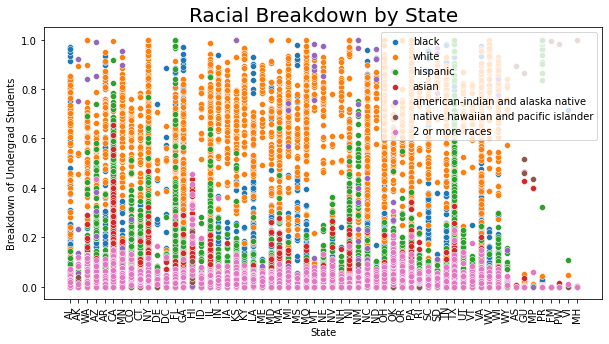

In [2]:
#get each race column as an an array
black = df.black_ugds
white = df.white_ugds
hispanic = df.hisp_ugds
asian = df.asian_ugds
aian = df.AIAN_ugds
nhpi = df.NHPI_ugds
biracial = df.birac_ugds

#create a matplotlib figure, assign title and labels
plt.figure(figsize=(10,5))
plt.title('Racial Breakdown by State', fontsize=20)
plt.xlabel("State")
plt.ylabel("Breakdown of Undergrad Students")
plt.xticks(rotation=90)

#add each array as a scatterplot
sns.scatterplot(x=df.state, y=black)
sns.scatterplot(x=df.state, y=white)
sns.scatterplot(x=df.state, y=hispanic)
sns.scatterplot(x=df.state, y=asian)
sns.scatterplot(x=df.state, y=aian)
sns.scatterplot(x=df.state, y=nhpi)
sns.scatterplot(x=df.state, y=biracial)
plt.legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'])

This scatterplot is very difficult to interpret, so we will take the average within each state. This leaves us fewer data points and a basis for comparison when looking at trends in universities in different states.

In [3]:
df2 = df.filter(['black_ugds', 'white_ugds', 'hisp_ugds', 'asian_ugds', 'AIAN_ugds', 'NHPI_ugds', 'birac_ugds', 'state', 'adm_rate', 'atnd_cost_acad_yr'], axis=1)
df2 = df2.round({'latitude':1}).groupby('state').mean()

Now, if we make a similar plot to the one above, it should be clearer per state. This time, we opted to use a line plot to emphasize peaks and troughs for different states.

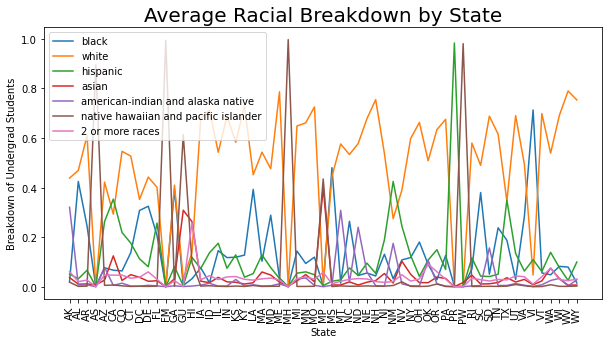

In [4]:
plt.figure(figsize=(10,5))
plt.title('Average Racial Breakdown by State', fontsize=20)
plt.xlabel("State")
plt.ylabel("Breakdown of Undergrad Students")
plt.xticks(rotation=90)

#add each array as a scatterplot
sns.lineplot(x=df2.index, y=df2.black_ugds)
sns.lineplot(x=df2.index, y=df2.white_ugds)
sns.lineplot(x=df2.index, y=df2.hisp_ugds)
sns.lineplot(x=df2.index, y=df2.asian_ugds)
sns.lineplot(x=df2.index, y=df2.AIAN_ugds)
sns.lineplot(x=df2.index, y=df2.NHPI_ugds)
sns.lineplot(x=df2.index, y=df2.birac_ugds)
plt.legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'])

This information is somewhat intuitive, but helps us in our exploratory data analysis. Next, we will come up with a hypothesis about this data, and this background knowledge of race breakdown by state will come into play.

In this tutorial, we are hypothesizing that tuition rates have some relationship to the racial breakdown of universities.

R squared:		 0.007290134862703246
Coefficient:		 -0.01965678931721349
Y intercept:		 2720.2549338340173
Mean squared error:	 13541223.879117632


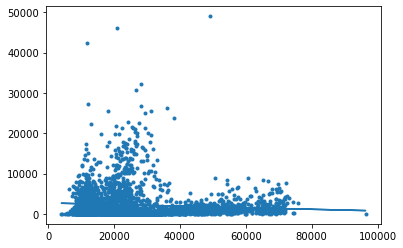

In [88]:
# WHITE
data = {}
for ind,r in df.iterrows():
    num = r['white_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

white_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])
#sns.lmplot(x='cost' ,y='pop', data=white_df, fit_reg=True, scatter_kws={"s": 10})



x = np.array(white_df['cost']).reshape(-1,1)
y = np.array(white_df['pop']).reshape(-1,1)
lin_reg = lin().fit(x,y)

print("R squared:\t\t", lin_reg.score(x,y))
print("Coefficient:\t\t", lin_reg.coef_[0][0])
print("Y intercept:\t\t", lin_reg.intercept_[0])

# Linear prediction
y_pred = lin_reg.predict(x)
print("Mean squared error:\t", mse(white_df['pop'], y_pred))

# Display the graph with the linear regression
plt.scatter(white_df['cost'], white_df['pop'], marker='.')
plt.plot(white_df['cost'], y_pred)
plt.show()

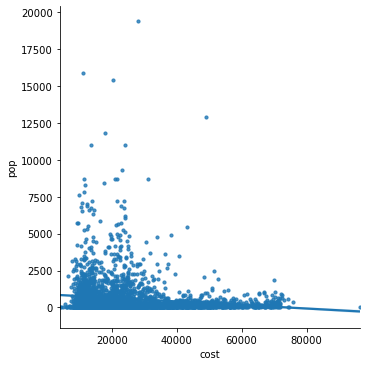

In [67]:
# BLACK
data = {}
for ind,r in df.iterrows():
    num = r['black_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

black_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])
sns.lmplot(x='cost' ,y='pop', data=black_df, fit_reg=True, scatter_kws={"s": 10})

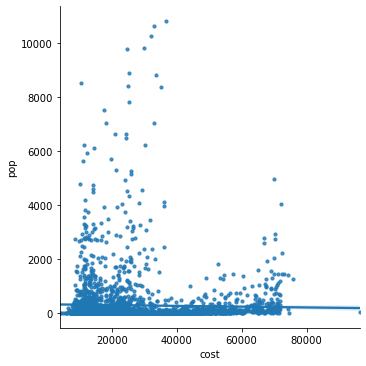

In [68]:
# ASIAN
data = {}
for ind,r in df.iterrows():
    num = r['asian_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

asian_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])
sns.lmplot(x='cost' ,y='pop', data=asian_df, fit_reg=True, scatter_kws={"s": 10})

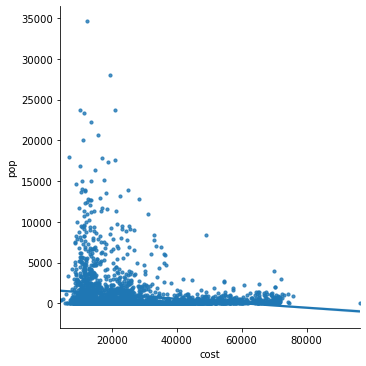

In [69]:
# HISPANIC
data = {}
for ind,r in df.iterrows():
    num = r['hisp_ugds'] * r['UGDS']
    cost = r['atnd_cost_acad_yr']
    if cost in data:
        data[cost] = num + data[cost]
    else:
        data[cost] = num

hisp_df = pd.DataFrame(data.items(), columns=['cost', 'pop'])
sns.lmplot(x='cost' ,y='pop', data=hisp_df, fit_reg=True, scatter_kws={"s": 10})

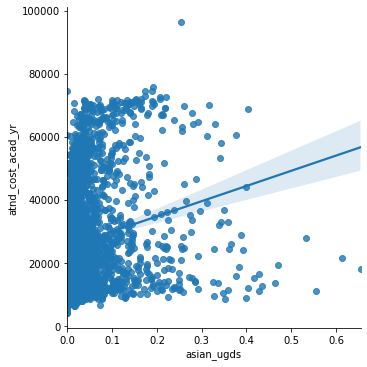

In [8]:
asian_df = df.filter(["asian_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='asian_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

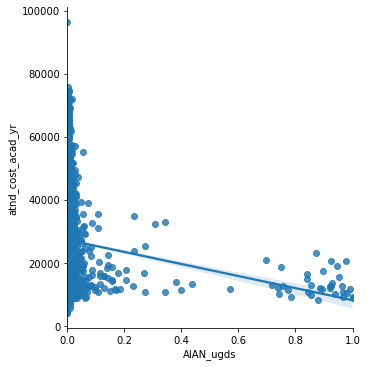

In [9]:
aian_df = df.filter(["AIAN_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='AIAN_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

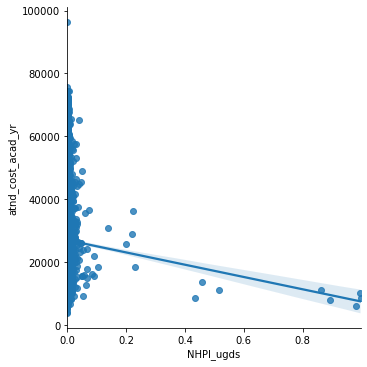

In [10]:
nhpi_df = df.filter(["NHPI_ugds","state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='NHPI_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

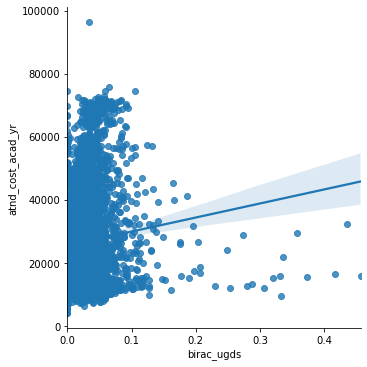

In [11]:
biracial_df = df.filter(["birac_ugds", "state", "inst_name", "latitude", "longitude", "atnd_cost_acad_yr", "net_tuition_rev_per_fts"])
sns.lmplot(x='birac_ugds',y='atnd_cost_acad_yr',data=df,fit_reg=True)

At first glance, the relationship between the racial breakdown of colleges and the attendance cost does not seem linear, if it exists at all.

In [12]:
import statsmodels.formula.api as sm

#attendance cost is predicted upon race + state + race * state.

rxn = sm.ols('adm_rate ~ black_ugds + state + black_ugds*state', data=df).fit()

summ = rxn.summary()
print(summ)
import statsmodels.formula.api as sm

                            OLS Regression Results                            
Dep. Variable:               adm_rate   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.582
Date:                Mon, 17 May 2021   Prob (F-statistic):           0.000236
Time:                        05:17:21   Log-Likelihood:                 337.51
No. Observations:                1815   AIC:                            -463.0
Df Residuals:                    1709   BIC:                             120.4
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0